In [1]:
%run Data_Science_Preprocessing.ipynb

2020-11-08 16:15:20 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-11-08 16:15:20 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-08 16:15:20 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-11-08 16:16:53 [matplotlib] DEBUG: (private) matplotlib data path: C:\Users\julia\anaconda3\envs\Data Science\lib\site-packages\matplotlib\mpl-data
2020-11-08 16:16:53 [matplotlib] DEBUG: matplotlib data path: C:\Users\julia\anaconda3\envs\Data Science\lib\site-packages\matplotlib\mpl-data
2020-11-08 16:16:53 [matplotlib] DEBUG: CONFIGDIR=C:\Users\julia\.matplotlib
2020-11-08 16:16:53 [matplotlib] DEBUG: matplotlib version 3.3.1
2020-11-08 16:16:53 [matplotlib] DEBUG: interactive is False
2020-11-08 16:16:53 [matplotlib] DEBUG: platform is win32
2020-11-08 16:16:53 [matplotlib] DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', '_collect

2020-11-08 16:16:53 [matplotlib] DEBUG: CACHEDIR=C:\Users\julia\.matplotlib
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: Using fontManager instance from C:\Users\julia\.matplotlib\fontlist-v330.json
2020-11-08 16:16:53 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-11-08 16:16:53 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-11-08 16:16:53 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.579076
std,0.016052
min,0.551415
25%,0.572381
50%,0.575824
75%,0.584021
max,0.621805


Durchwachstumfnl sind die prognostizierten durchschnittlichen täglichen Wachstumsraten aller deutschen Bundesländer. Prognosen wurden mithilfe von erhobenen Daten bis zum 30.06 berechnet.

In [4]:
compLK.describe()

,AGR,AGR_D,Bev.D.Ew./km²
count,280.000000,280.000000,280.000000
mean,9.658100,12.272411,341.725000
std,16.102230,72.953839,431.041806
min,2.245455,-0.450450,39.000000
25%,5.321871,1.963652,109.750000
50%,6.408620,3.071789,169.000000
75%,7.517026,4.179298,339.250000
max,152.113099,1131.448160,2954.000000


compLK sind die durchschnittlichen täglichen Wachstumsraten deutscher Landkreis und die Bevölkerungsdichte jedes deutschen Landkreises. 

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,1607.000000,1607.000000
mean,3.683416,91.152116
std,1.786995,596.305345
min,0.333333,0.196519
25%,2.436664,6.526914
50%,3.499712,17.148318
75%,4.665372,45.521004
max,16.825131,18671.140601


DFCounty sind die durchschnittlichen täglichen Wachstumsraten us-amerikanischer Counties. Sie sind mit deutschen Landkreisen vergleichbar. Außerdem wurd noch dieBevölkerungsdichte mit Daten von 2010 erhoben. Da es in den USA keine Einwohnermeldeämter gibt machen sie alle 10 Jahre eine Volkszählung. Die letzte Volkszählung war 2010. 

Über d[] lassen sich deutsche Landkreise aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und Toden und deren tägliche Veränderung. Damit wurde compLK berechnet.

In [6]:
dic['Albany County'].describe()

,cases,dailycases,Rate
count,150.000000,150.000000,150.000000
mean,707.613333,13.660000,6.408761
std,776.322209,17.232259,19.794056
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,312.000000,9.000000,0.767365
75%,1490.250000,20.000000,4.137996
max,2049.000000,98.000000,150.000000


Über dic[] lassen sich amerikanische Counties aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und deren tägliche Veränderung. Damit wurde DFCounty berechnet.

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans' (

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial monospaced for SAP' (arimonbd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'EuropeExt' (EuropeExt.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
2020-11-0

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPDings' (sapdn.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
2020-11-08 16:16:53 [matplotlib

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaBD.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
2020-11-08 16

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Micra' (Micra-Normal.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeys' (TINspireKeys.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPIcons' (sapin.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotl

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Bd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPGUI-Icons' (SAPGUI-icons.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145


2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DECODE' (ARDECODE.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
2020-11-08 16:16:53 [matp

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Italic.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaBI.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire' (TI-NspireBd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaIT.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR BLANCA' (ARBLANCA.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
2020-11-08 1

2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DELANEY' (ARDELANEY.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Unicode MS' (ARIALUNI.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:53 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
2

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matpl

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 6.888636363636364
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
2020-11

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'GeForce' (GeForce_Light.otf) normal normal 300 normal>) = 10.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DESTINE' (ARDESTINE.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CARTER' (ARCARTER.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\julia\\anaconda3\\envs\\Data Science\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') w

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysCX' (TINspireKeysCX.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
202

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matpl

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR HERMANN' (ARHERMANN.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'NDO' (NDO_v4.0.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'GeForce' (GeForce_Bold.otf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire' (TI-NspireBdIt.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_ma

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.f

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DESTINE' (ARDESTINE.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 1

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Visitor TT1 BRK' (visitor TT1 BRK.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
2020-11-08 1

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-BoldItalic.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplot

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Rg.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
2020

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaRG.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:1

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CHRISTY' (ARCHRISTY.ttf) normal normal 5 normal>) = 10.42525
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.fo

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matpl

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.9713636363636367
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysTouch' (TINspireKeysTouch.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysTouch' (TINspireKeysTouch.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.413636363636363
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_BdIt.ttf) italic normal 700 normal>) = 1

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CHRISTY' (ARCHRISTY.ttf) normal normal 5 normal>) = 10.71025
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'WarHeliosCondCBold' (WarHeliosCondCBold.ttf) normal normal 700 condensed>) = 10.25
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 6.613636363636363
2020

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 350 normal>) = 10.3825
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR BERKLEY' (ARBERKLEY.ttf) normal normal 5 normal>) = 10.71025
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.335
2020-

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.4395
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Wingdings 3' (wingding3.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Bold.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'EuropeExt' (EuropeExt.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.145
2020-11-08 16:16:54 [matplo

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'GeForce' (GeForce_Bold.otf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeys' (TINspireKeys.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matp

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.145
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matp

2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.535
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.43
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CENA' (ARCENA.ttf) normal normal 5 normal>) = 10.71025
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.335
2020-11-08 16:16:54 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:54 [matplotlib.font

2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.43
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MicraC' (MICRACB.OTF) normal normal 700 normal>) = 10.05
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.

2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 6.413636363636363
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Bd.ttf) normal normal 700 normal>) = 10.05
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.335
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.05
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Lt.ttf) normal normal 300 normal>) = 10.43
2020-11-08 16:16:55 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 norm

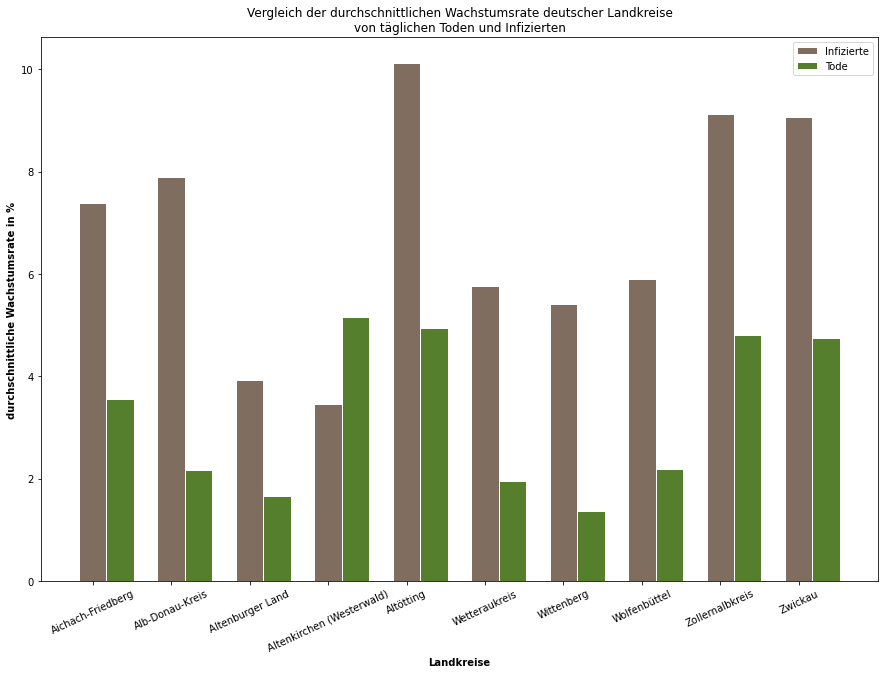

In [7]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKbar = pd.DataFrame()
compLK = compLK.loc[compLK['Landkreise/Kreis'] != 'Würzburg']
compLKbar = compLK.iloc[:5]
compLKbar = compLKbar.append(compLK.tail(5))
#compLKbar.plot(kind='bar', x = 'Landkreise/Kreis', y= 'AGR', ax=ax,label='durchschnittliche Wachstumsrate')

labels = compLKbar['Landkreise/Kreis']
width = 0.35  # the width of the bars
bars1 = compLKbar['AGR']
bars2 = compLKbar['AGR_D']
 
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]

plt.bar(r1, bars1, color='#7f6d5f', width=width, edgecolor='white', label='Infizierte')
plt.bar(r2, bars2, color='#557f2d', width=width, edgecolor='white', label='Tode')

plt.title('Vergleich der durchschnittlichen Wachstumsrate deutscher Landkreise\nvon täglichen Toden und Infizierten')
plt.xlabel('Landkreise', fontweight='bold')
plt.ylabel('durchschnittliche Wachstumsrate in %', fontweight='bold')
ax.set_xticklabels(labels)
ax.set_xticks(r1)
plt.xticks(rotation = 25)

plt.legend()
plt.show()

Wie man sehen kann haben die meisten Landkreise hatten die meisten Landkreise bis ende Juni durchschnittlich täglich 10% mehr Coronafälle. Es gibt zwar auch Ausreißer, wie zum Beispiel Wittenberg.

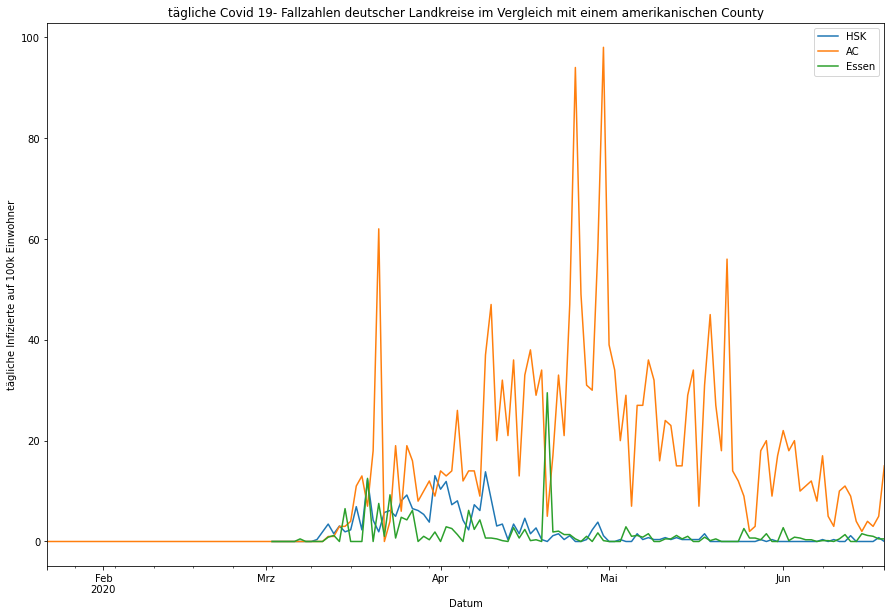

In [8]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

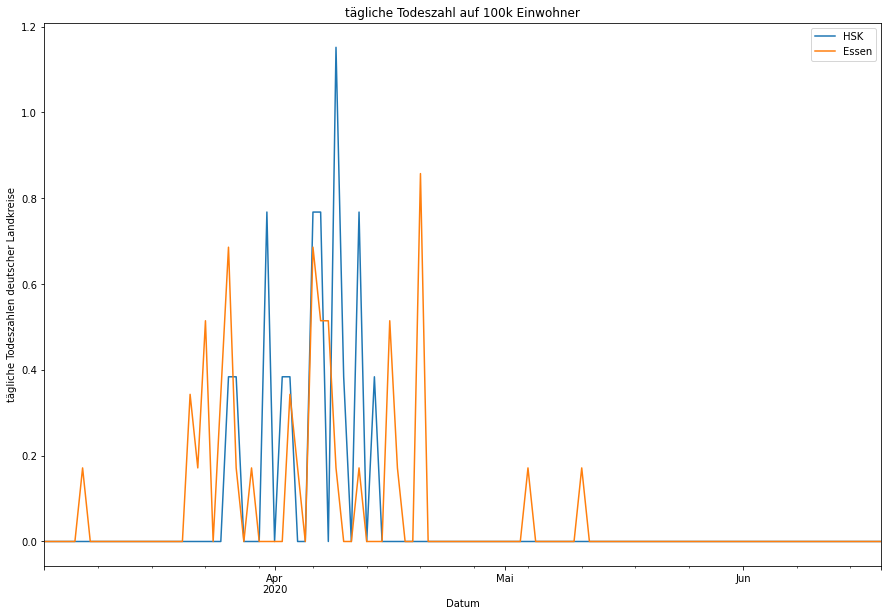

In [9]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl auf 100k Einwohner')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

(-0.6910449999999998, 50.0)

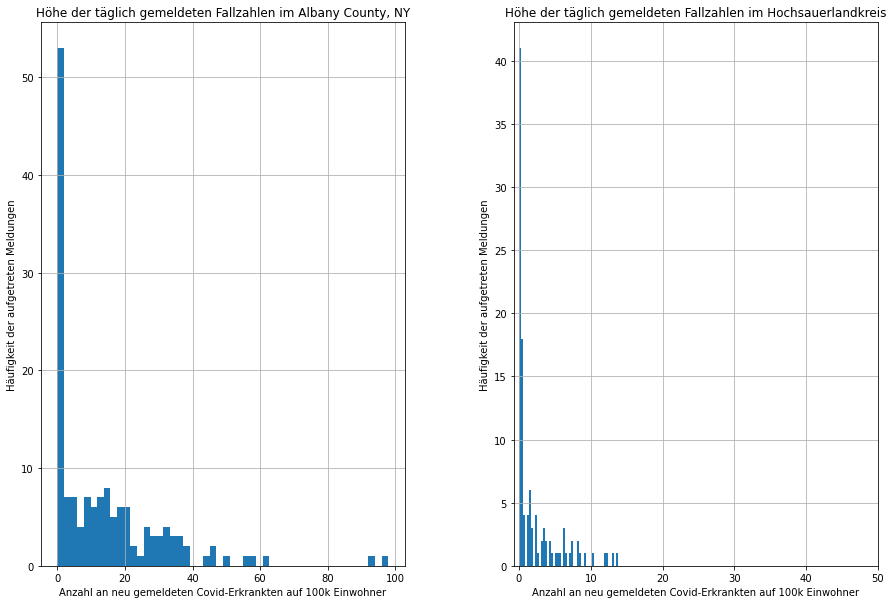

In [10]:
fig, ax = plt.subplots(1, 2,figsize = (15, 10))

dic['Albany County'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im Albany County, NY')

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')
ax[1].set_xlim(right = 50)

Zeigt an dass die meisten täglichen Meldungen Meldungen eine sehr geringe Anzahl an neue Infizierten hatten.
Hat nicht so geklappt wie es sollte. (Sollte Zusammenhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen).
Außerdem zeigt der Vergleich, dass im Albany County täglich höhere neue Fallzahlen gemeldet wurden als im HSK. Wobei es im HSK Maximal zu Tagen mit 15 neuen Fällen kam gibt es im Albany County schon Tage an denen bis zu 40 neue Infizierte gemeldet wurden.

In [11]:
d['Essen']

,index,location_label,cases,cases_per_100k,deaths,deaths_per_100k,source_label,source_website,publication_datetime,täglicher Wachstum,dailycases,dailydeaths,Rate,RateD,kumcases,kumdeaths,Wochentag
0,28708,Essen,0,0.0000,0,0.0000,0,0,2020-03-02,-1.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,Monday
1,28655,Essen,0,0.0000,0,0.0000,0,0,2020-03-03,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,Tuesday
2,28602,Essen,0,0.0000,0,0.0000,0,0,2020-03-04,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,Wednesday
3,28549,Essen,0,0.0000,0,0.0000,0,0,2020-03-05,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,Thursday
4,28496,Essen,0,0.0000,0,0.0000,0,0,2020-03-06,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,23143,Essen,898,154.0021,41,7.0313,0,0,2020-06-15,0.010124,1.5435,0.0,1.012373,0.0,154.0021,7.0313,Monday
106,23090,Essen,905,155.2025,41,7.0313,0,0,2020-06-16,0.007795,1.2004,0.0,0.779510,0.0,155.2025,7.0313,Tuesday
107,23037,Essen,911,156.2315,41,7.0313,0,0,2020-06-17,0.006630,1.0290,0.0,0.662983,0.0,156.2315,7.0313,Wednesday
108,22984,Essen,914,156.7460,41,7.0313,0,0,2020-06-18,0.003293,0.5145,0.0,0.329308,0.0,156.7460,7.0313,Thursday


2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Verbindung zwischen Tag und Höhe der Meldungen')

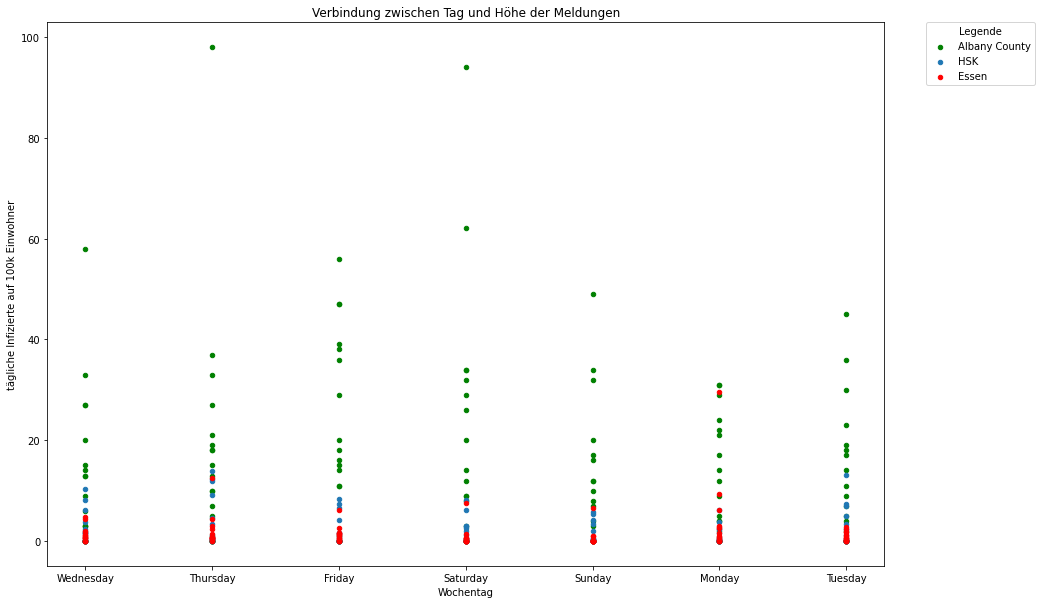

In [12]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County'].plot(kind='scatter', x = 'Weekday', y= 'dailycases', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
ax.set_xlabel('Wochentag')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')
ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [13]:
import statsmodels.formula.api as smf

In [14]:
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmges = smf.ols(formula='Gesamt ~ datef', data=bundzuwachsraw_1).fit()
predges = lmges.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictiongesamt'] = predges

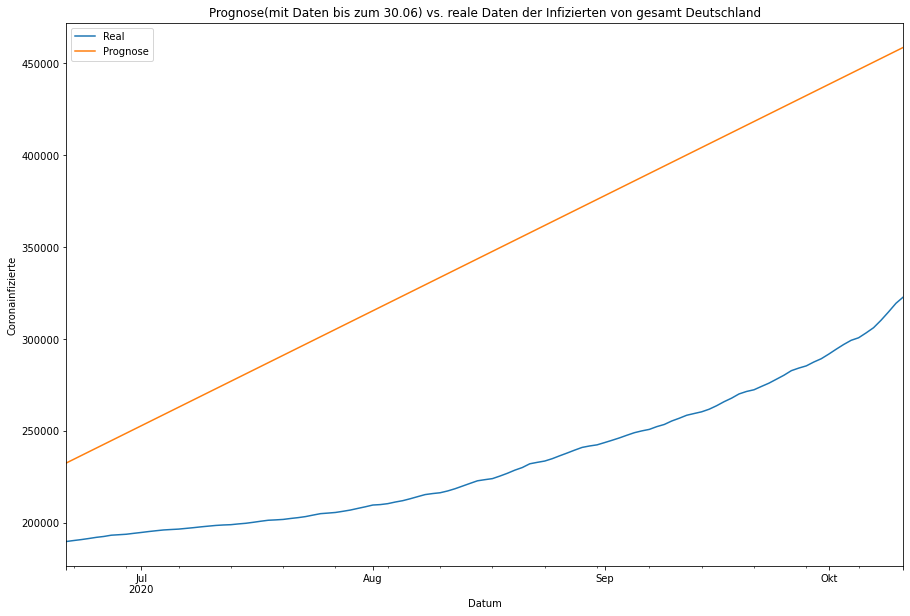

In [15]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'Gesamt', ax=ax, label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictiongesamt', ax=ax, label="Prognose")
ax.set_title('Prognose(mit Daten bis zum 30.06) vs. reale Daten der Infizierten von gesamt Deutschland')
ax.set_xlabel('Datum')
ax.set_ylabel('Coronainfizierte')
plt.show()

Man kann sehr gut sehen, dass die realen Daten unter der Prognose liegen, somit kann man sagen, dass es in Deutschland keine exponentielle Steigung der Coronainfizierten gab.

In [ ]:
import geopandas as gpd

DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch Thüringen und Bremen im Vergleich sehr hohe. Die Prognosen wurden mithilfe von Linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt

In [ ]:
lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutscher Landkreise')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [ ]:
print('p-Wert: \n',lm.pvalues)
compLKcorr = compLK.drop(columns=['Landkreise/Kreis'])
print('\nKorrelation: \n',compLKcorr.corr())
lm.summary()

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen. Der p-Wert ist sehr gering (0,008), das heißt dass die Beobachtungen die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen, nicht unterstützen. Auch die Korrelation unterstützt diese Aussage

In [ ]:
for j in range(10):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)
    
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

Ab hier ist zu beachten, dass die Daten der Counties viele Ausreißer haben und damit die grafische Darstellung etwas verzerrt ist und auch das Clustering nicht richtig funktioniert.

In [ ]:
#Hiermit könnte man die 10 am meisten Bevölkerten Counties löschen, da sie das Streudiagramm 
# und die daurauffolgenden Analysen sehr stark bei der grafischen Darstellung beeinflussen

f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend, preds2, c='red', linewidth=2)
ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n amerikanischer Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [ ]:
lm2.params

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [ ]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population','State'])
km = KMeans(n_clusters=4)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Cluster des zuvor erstellen Streudiagramms mit 4 Center. Wie man sieht geben die Daten zum Clustern nicht viel her. Es entstehen keine Gruppierungen sondern, dieser Datensatz ist mehr 1 großes Cluster.

In [ ]:
DFCountyState = DFCounty.loc[DFCounty['State'] == 'TX']
DFCountyState = DFCountyState.append(DFCounty.loc[DFCounty['State'] == 'CA'])
DFCountyState = DFCountyState.append(DFCounty.loc[DFCounty['State'] == 'WY'])
DFCountyState['State'] = np.where((DFCountyState.State == 'TX'),0,DFCountyState.State)
DFCountyState['State'] = np.where((DFCountyState.State == 'CA'),1,DFCountyState.State)
DFCountyState['State'] = np.where((DFCountyState.State == 'WY'),2,DFCountyState.State)
DFCountyState

In [ ]:
DFCountyfnlState = DFCountyState.drop(columns=['County','Area','Population'])
DFCountyStatefnl = DFCountyfnlState.drop(columns=['State'])
km = KMeans(n_clusters=3)
km.fit(DFCountyStatefnl)
y_km = km.predict(DFCountyStatefnl)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyStatefnl["Density"], DFCountyStatefnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='+',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Kalifornien vs. Texas vs. Wyoming")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Hier habe ich nochmal die Counties von drei Staaten gruppiert und dann geclustered. Bei den Staaten habe ich mich für Texas, Kalifornien und Wyoming entschieden, da diese sehr unterschiedlich sínd. Jedoch bringen auch hier die Cluster keine guten Ergebnisse.

In [ ]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
neigh = pd.DataFrame()
DFCountyfnl = DFCountyfnl.fillna(0)
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [ ]:
y = neigh['Typ'].to_numpy()
X = neigh[['AGR','Dichte']].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("durchschnittliches Wachstum")
    ax.set_ylabel("Dichte")
    
axes[0].legend(loc=3)
plt.show()

In [ ]:
print("Test set score: {:.5f}".format(score))
print("Test set predictions:\n{}".format(pred))

Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot. Auf jeden Fall kann man sehen dass es keinen erkennbaren Unterschied zwischen Landkreisen und Counties gibt.

In [ ]:
from sklearn.metrics import r2_score
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmbay = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predbay = lmbay.predict(bundzuwachsraw_2['datef']).to_numpy()
BAY = bundzuwachsraw_2['BY'].to_numpy()

lmnw = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
prednw = lmnw.predict(bundzuwachsraw_2['datef']).to_numpy()
NW = bundzuwachsraw_2['NW'].to_numpy()

#Bestimmtheitsmaß von Bayern und NRW
scoreby = r2_score(BAY,predbay)
scorenw = r2_score(NW,prednw)

print("Bayern: %.2f" %scoreby, ' NRW: %.2f' %scorenw)

Man sieht dass die angeführten Prognosen in NRW mehr auf die Realität passen als die in Bayern, da das Bestimmtheitsmaß in NRW näher an 1 liegt als das von Bayern. Beide liegen unter den Prognosen. Das ist gut, jedoch hat Bayern laut dem Bestimmtheismaßes die Epidemie besser im Griff gehabt.

In [ ]:
print("HSK:\n",d['Hochsauerlandkreis'][['cases_per_100k','deaths_per_100k']].describe())
print("\nKöln:\n",d['Köln'][['cases_per_100k','deaths_per_100k']].describe())

fig, ax = plt.subplots(1, 2,figsize = (15, 10))

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im HSK')

d['Köln'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen in Köln')
ax[1].set_xlim(right = 15)

Köln und der Hochsauerlandkreis sind sich sehr ähnlich. Was man anhand der describe-Funktion und dem Histogramm sehen kann.